# Doces mais populares do hallowen #

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
candy = pd.read_csv('candy-data.csv')

In [3]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


### 5 doces mais populares ###

In [6]:
candy.groupby('competitorname')['winpercent'].max().sort_values(ascending=False).head()

competitorname
ReeseÕs Peanut Butter cup    84.180290
ReeseÕs Miniatures           81.866257
Twix                         81.642914
Kit Kat                      76.768600
Snickers                     76.673782
Name: winpercent, dtype: float64

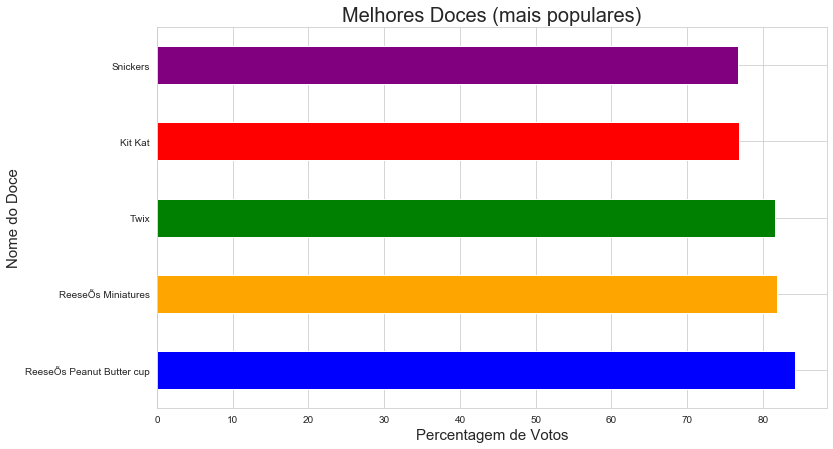

In [7]:
plt.figure(figsize=(12,7))
candy.groupby('competitorname')['winpercent'].max().sort_values(ascending=False).head().plot(kind='barh', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Melhores Doces (mais populares)' ,fontdict={'fontsize': 20})
plt.ylabel('Nome do Doce', fontdict={'fontsize': 15})
plt.xlabel('Percentagem de Votos', fontdict={'fontsize': 15})
plt.show()

### Doces menos populares ###

In [8]:
candy.groupby('competitorname')['winpercent'].max().sort_values(ascending=False).tail()

competitorname
Jawbusters            28.127439
Super Bubble          27.303865
Chiclets              24.524988
Boston Baked Beans    23.417824
Nik L Nip             22.445341
Name: winpercent, dtype: float64

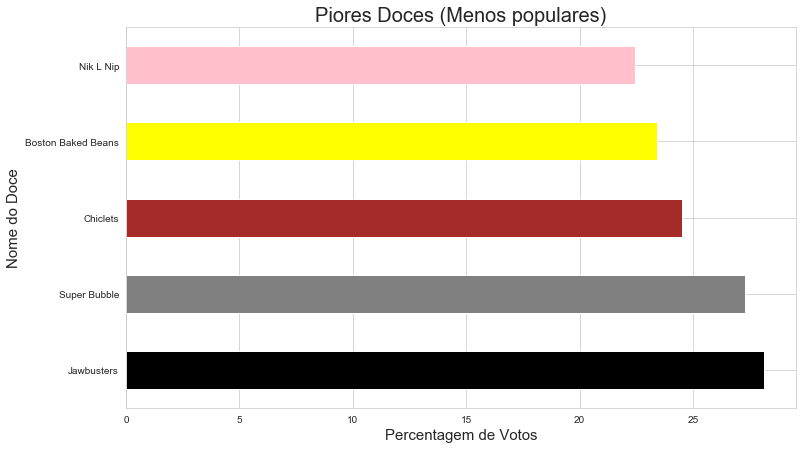

In [9]:
plt.figure(figsize=(12,7))
candy.groupby('competitorname')['winpercent'].max().sort_values(ascending=False).tail().plot(kind='barh', color=['black', 'gray', 'brown', 'yellow', 'pink'])
plt.title('Piores Doces (Menos populares)' ,fontdict={'fontsize': 20})
plt.ylabel('Nome do Doce', fontdict={'fontsize': 15})
plt.xlabel('Percentagem de Votos', fontdict={'fontsize': 15})
plt.show()

### Ingredientes mais utilizados ###

In [10]:
flavours = candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer']]

In [11]:
flavours.sum()

chocolate           37
fruity              38
caramel             14
peanutyalmondy      14
nougat               7
crispedricewafer     7
dtype: int64

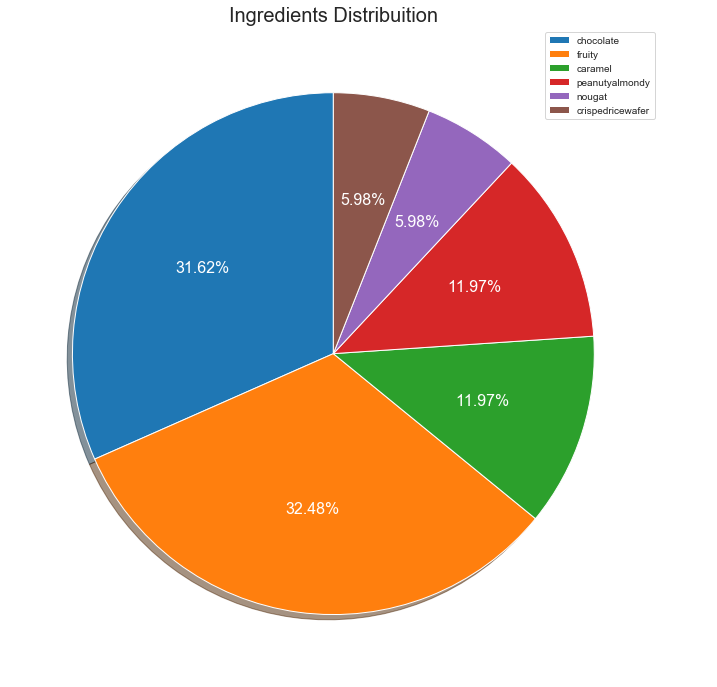

In [12]:
plt.figure(figsize=(17,12))
flavours.sum().plot.pie(autopct='%2.2f%%', shadow=True, startangle=90, textprops=dict(color="w", fontsize=16))
plt.title('Ingredients Distribuition' ,fontdict={'fontsize': 20})
plt.axis('off')
plt.legend()
plt.show()

### Doces com maior nível de açucar ###

In [13]:
candy.groupby('competitorname')['sugarpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer'].max().sort_values(by='sugarpercent', ascending=False).head()

,sugarpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer
competitorname,,,,,,,
ReeseÕs stuffed with pieces,0.988,1,0,0,1,0,0
Sugar Babies,0.965,0,0,1,0,0,0
Milky Way Simply Caramel,0.965,1,0,1,0,0,0
Skittles wildberry,0.941,0,1,0,0,0,0
Skittles original,0.941,0,1,0,0,0,0


## Regressão linear ##

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Prevendo as possibilidades de um doce conter chocolates através dos outros dados ###

In [15]:
X = candy[['sugarpercent', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y = candy[['chocolate']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [17]:
logregression = LogisticRegression()

In [18]:
logregression.fit(X_train, y_train.values.ravel())

C:\Users\Yan_1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
prediction = logregression.predict(X_test)

In [20]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.80      1.00      0.89        16

    accuracy                           0.91        43
   macro avg       0.90      0.93      0.90        43
weighted avg       0.93      0.91      0.91        43



In [21]:
print(confusion_matrix(y_test, prediction))

[[23  4]
 [ 0 16]]


### Precisão do modelo ###

In [22]:
print(accuracy_score(y_test, prediction))

0.9069767441860465
